In [66]:
%matplotlib inline

In [67]:
import matplotlib.pyplot as plt
import json
import requests
from config import api_key
from config import email
import pandas as pd

In [68]:
toluene = pd.read_csv("Database/Toluene/Toluene.csv")
toluene.head()

,STATE_ABBR,AMA_SITE_CODE,AQS_POC,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,AQS_PARAMETER_CODE,AQS_PARAMETER_NAME,...,AQS_QUALIFIER_10,AQS_METHOD_CODE,SAMPLE_COLLECTION_DESC,SAMPLE_ANALYSIS_DESC,SAMPLE_VALUE_FLAG,BELOW_MDL_FLAG,CENSUS_TRACT_ID,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
0,NJ,340390004,1,SLAMS,2016,3,17-Sep-16,18:00,45202,Toluene,...,NaN,92,Tenax/GR/Trap,Thermal Desorber GC/PID,NaN,NaN,34039030600,3685,40.64144,-74.208365
1,NJ,340390004,1,SLAMS,2016,3,17-Sep-16,05:00,45202,Toluene,...,NaN,92,Tenax/GR/Trap,Thermal Desorber GC/PID,NaN,NaN,34039030600,3685,40.64144,-74.208365
2,NJ,340390004,1,SLAMS,2016,3,18-Sep-16,09:00,45202,Toluene,...,NaN,92,Tenax/GR/Trap,Thermal Desorber GC/PID,NaN,NaN,34039030600,3685,40.64144,-74.208365
3,NJ,340390004,1,SLAMS,2016,3,18-Sep-16,08:00,45202,Toluene,...,NaN,92,Tenax/GR/Trap,Thermal Desorber GC/PID,NaN,NaN,34039030600,3685,40.64144,-74.208365
4,NJ,340390004,1,SLAMS,2016,3,18-Sep-16,07:00,45202,Toluene,...,NaN,92,Tenax/GR/Trap,Thermal Desorber GC/PID,NaN,NaN,34039030600,3685,40.64144,-74.208365


In [69]:
columns = 'PROGRAM', 'CENSUS_TRACT_POPULATION_2010', 'MONITOR_LATITUDE', 'MONITOR_LONGITUDE', 'YEAR', 'QUARTER','SAMPLE_DATE', 'SAMPLE_START_TIME', 'DATA_SOURCE', 'DURATION_DESC', 'SAMPLE_VALUE_REPORTED', 'UNIT_DESC', 'AQS_UNIT_CODE', 'SAMPLING_FREQUENCY_CODE', 'SAMPLE_VALUE_STD_FINAL_UG_M3','SAMPLE_VALUE_STD_FINAL_TYPE', 'MDL_STD_UG_M3','MDL_TYPE', 'AQS_METHOD_CODE', 'SAMPLE_COLLECTION_DESC', 'SAMPLE_ANALYSIS_DESC'
toluene_clean = toluene.filter(items=columns)
toluene_clean.head()

,PROGRAM,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DATA_SOURCE,DURATION_DESC,...,UNIT_DESC,AQS_UNIT_CODE,SAMPLING_FREQUENCY_CODE,SAMPLE_VALUE_STD_FINAL_UG_M3,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,MDL_TYPE,AQS_METHOD_CODE,SAMPLE_COLLECTION_DESC,SAMPLE_ANALYSIS_DESC
0,SLAMS,3685,40.64144,-74.208365,2016,3,17-Sep-16,18:00,AQS_20171121,1 HOUR,...,PARTS PER BILLION,8,1,0.634496,L,0.376857,FEDERAL_MDL,92,Tenax/GR/Trap,Thermal Desorber GC/PID
1,SLAMS,3685,40.64144,-74.208365,2016,3,17-Sep-16,05:00,AQS_20171121,1 HOUR,...,PARTS PER BILLION,8,1,4.265894,L,0.376857,FEDERAL_MDL,92,Tenax/GR/Trap,Thermal Desorber GC/PID
2,SLAMS,3685,40.64144,-74.208365,2016,3,18-Sep-16,09:00,AQS_20171121,1 HOUR,...,PARTS PER BILLION,8,1,2.103553,L,0.376857,FEDERAL_MDL,92,Tenax/GR/Trap,Thermal Desorber GC/PID
3,SLAMS,3685,40.64144,-74.208365,2016,3,18-Sep-16,08:00,AQS_20171121,1 HOUR,...,PARTS PER BILLION,8,1,2.332506,L,0.376857,FEDERAL_MDL,92,Tenax/GR/Trap,Thermal Desorber GC/PID
4,SLAMS,3685,40.64144,-74.208365,2016,3,18-Sep-16,07:00,AQS_20171121,1 HOUR,...,PARTS PER BILLION,8,1,2.042216,L,0.376857,FEDERAL_MDL,92,Tenax/GR/Trap,Thermal Desorber GC/PID


In [70]:
# First look at the data

print(f"program descript: {len(toluene_clean.PROGRAM.value_counts())} programs")
print(toluene_clean.PROGRAM.value_counts())
print()
print(f"duration descript:")
print(toluene_clean.DURATION_DESC.value_counts())
print()
print(f"total locations: lat-{toluene_clean.MONITOR_LATITUDE.value_counts().count()} / lon-{toluene_clean.MONITOR_LONGITUDE.value_counts().count()}")
print()
#print(f"checkout start times:")
#print(toluene_clean.SAMPLE_START_TIME.value_counts())
      

program descript: 6 programs
PAMS                            92910
SLAMS                           27433
UATMP                            3116
OTHER                             255
SPECIAL PURPOSE                    95
SCHOOL AIR TOXICS MONITORING       51
Name: PROGRAM, dtype: int64

duration descript:
1 HOUR      119498
24 HOURS      4186
3 HOURS        176
Name: DURATION_DESC, dtype: int64

total locations: lat-18 / lon-18



In [71]:
toluene_clean["SAMPLE_DATE"].dtype

dtype('O')

In [72]:
#toluene_clean["SAMPLE_DATE"] = pd.to_datetime(toluene_clean.SAMPLE_DATE)
#toluene_clean.head()

In [73]:
toluene_hourly = toluene_clean[toluene_clean['DURATION_DESC'] == '1 HOUR']
toluene_daily = toluene_clean[toluene_clean['DURATION_DESC'] == '24 HOUR']
toluene_three = toluene_clean[toluene_clean['DURATION_DESC'] == '3 HOUR']


In [74]:
yearly = toluene_clean.groupby(by='YEAR')
year_group = yearly['SAMPLE_VALUE_STD_FINAL_UG_M3'].mean()
year_group

YEAR
1990    10.865009
1991    17.910314
1992    17.469820
1993    12.581520
1994    13.681692
1995     2.379641
1996     4.041037
1997     3.616655
1998     3.285326
1999     2.749267
2000     2.643130
2001     2.908448
2002     2.148268
2003     2.231783
2004     5.983963
2005     2.261997
2006     1.470116
2007     1.391729
2008     1.598624
2009     1.660722
2010     0.929808
2011     0.947460
2012     1.041875
2013     0.831404
2014     0.678599
2015     1.171501
2016     2.307031
Name: SAMPLE_VALUE_STD_FINAL_UG_M3, dtype: float64

In [75]:
year_list = yearly['YEAR'].unique()
year_list

YEAR
1990    [1990]
1991    [1991]
1992    [1992]
1993    [1993]
1994    [1994]
1995    [1995]
1996    [1996]
1997    [1997]
1998    [1998]
1999    [1999]
2000    [2000]
2001    [2001]
2002    [2002]
2003    [2003]
2004    [2004]
2005    [2005]
2006    [2006]
2007    [2007]
2008    [2008]
2009    [2009]
2010    [2010]
2011    [2011]
2012    [2012]
2013    [2013]
2014    [2014]
2015    [2015]
2016    [2016]
Name: YEAR, dtype: object

Text(0, 0.5, 'Sample Value Mean')

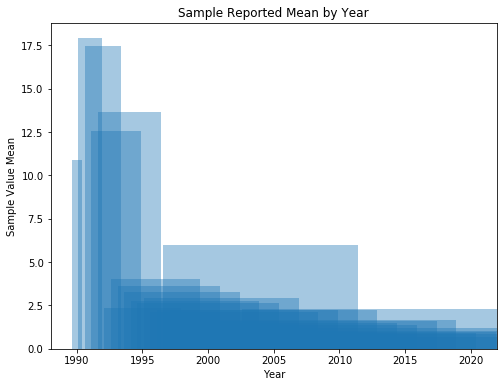

In [76]:
plt.figure(figsize=(8,6))
plt.bar(year_list,year_group, alpha=0.4)
plt.xlim(1988,2022)
plt.title('Sample Reported Mean by Year', size=12)
plt.xlabel('Year', size=10)
plt.ylabel('Sample Value Mean', size=10)

In [49]:
#x_axis = toluene_clean["SAMPLE_DATE"]
#y = toluene_clean["SAMPLE_VALUE_STD_FINAL_UG_M3"]

#plt.plot(x_axis, y)
#plt.show()

#groupby_test = toluene_clean.groupby(["MONITOR_LATITUDE", "SAMPLE_DATE"])["SAMPLE_VALUE_STD_FINAL_UG_M3"]
#groupby_test2 = pd.DataFrame(groupby_test.mean())
#groupby_test2

In [80]:
#groupby_test = toluene_clean.groupby(["PROGRAM", "SAMPLE_DATE"])["SAMPLE_VALUE_STD_FINAL_UG_M3"]
#groupby_test2 = pd.DataFrame(groupby_test.mean())
#groupby_test2

In [81]:
#sem_test = groupby_test.sem()
#sem_test2 = pd.DataFrame(sem_test)
#sem_test2.head()